In [2]:
import PIL
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

In [3]:
def getListOfListImage(imgPath="", showImage=False):
  #urlLena = "https://drive.google.com/drive/folders/1KBhg14i9R0dfyOAPAFT4dPtCUG8Lm5ul?usp=sharing"
  urlLena = "/Users/reginaldocunha/Documents/Especialização em Deep Learning/Programação pra Deep Learning/Atividade avaliativa 1/lenna.png"
  if (imgPath == ""):
    img = PIL.Image.open(urlLena)
  else:
    img = PIL.Image.open(imgPath)
  
  gray_img = img.convert("L")

  gray_img = gray_img.resize((128,128))

  if  showImage:
    plt.imshow(gray_img, cmap='gray')
  xSize, ySize = gray_img.size

  listaPixels = list(gray_img.getdata())
  arrayPixels = np.array(listaPixels)

  listOfListImage = arrayPixels.reshape((xSize, ySize)).tolist()
  return listOfListImage, np.zeros((xSize,ySize)).tolist()

In [4]:
def getImageFromListofList(listOfListImage):
  newImageArray = np.array(listOfListImage)

  #%matplotlib inline
  imshow(np.asarray(newImageArray),cmap='gray')

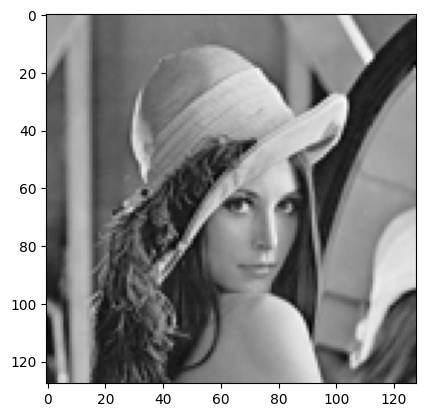

In [5]:
listOfListImage, listOfListNewImage = getListOfListImage(showImage=True)

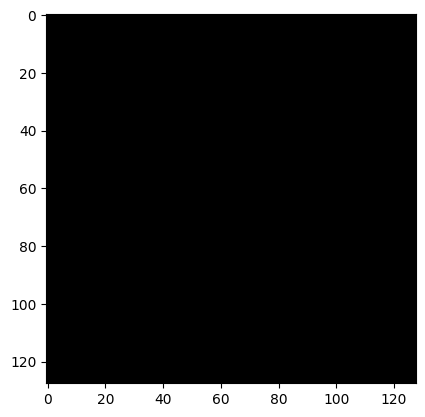

In [6]:
getImageFromListofList(listOfListNewImage)

In [7]:
listaDeLista, listaDeListaZerada = getListOfListImage(imgPath="", showImage=False)

In [8]:
# Convertendo a listaDeLista em array Numpy
list_imagem = np.array(listaDeLista)
list_imagem

array([[162, 161, 161, ..., 120, 163, 163],
       [160, 159, 159, ..., 126, 129, 101],
       [157, 156, 157, ..., 103,  56,  43],
       ...,
       [ 53,  55,  59, ...,  57,  53,  62],
       [ 51,  53,  54, ...,  58,  70,  88],
       [ 48,  51,  50, ...,  68,  91, 102]])

In [9]:
# Convertendo a listaDeListaZerada em array Numpy
resultado = np.array(listaDeListaZerada)
resultado

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Convertendo a filter1, 2, 3 e 4 em array Numpy
filter1 = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]
filter2 = [[0,0,0],[1,0,0],[0,0,0]]
filter3 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
filter4 = [[1,0,-1],[2,0,-2],[1,0,-1]]

filter1 = np.array(filter1)
filter2 = np.array(filter2)
filter3 = np.array(filter3)
filter4 = np.array(filter4)

Criar função de convolução

In [11]:
def convolucao(imagem, filtro):
    """Função que efetua os calculos de convolução.

    Args:
        imagem (array numpy): array contendo a matriz que representa a imagem.
        filtro (array numpy): array contendo a matriz do filtro a ser aplicado na imagem.
    """
    
    cont = 0
    i = 0
    j = 1
    k = 2
    l = 0
    m = 1
    n = 2
    loop_lin = imagem.shape[0] - filtro.shape[0] + 1
    loop_col = imagem.shape[1] - filtro.shape[1] + 1
    
    
    for cont in range(loop_lin):
        for cont in range(loop_col):
            img00 = imagem[i][l] * filtro[0][0]
            img01 = imagem[i][m] * filtro[0][1]
            img02 = imagem[i][n] * filtro[0][2]
            lin0 = img00 + img01 + img02
    
            img10 = imagem[j][l] * filtro[1][0]
            img11 = imagem[j][m] * filtro[1][1]
            img12 = imagem[j][n] * filtro[1][2]
            lin1 = img10 + img11 + img12
    
            img20 = imagem[k][l] * filtro[2][0]
            img21 = imagem[k][m] * filtro[2][1]
            img22 = imagem[k][n] * filtro[2][2]
            lin2 = img20 + img21 + img22
    
            resultado[j][m] = lin0 + lin1 + lin2
            
            l += 1
            m += 1
            n += 1
            img00 = img01 = img02 = 0
            img10 = img11 = img12 = 0
            img20 = img21 = img22 = 0
            lin0 = lin1 = lin2 = 0
            
    
        i += 1
        j += 1
        k += 1
        l = 0
        m = 1
        n = 2
    
        cont += 1
    
    return resultado
    

# Questão 1

Construa um código que aplique um filtro numa imagem. Este filtro terá tamanho 3x3. Você deve aplicar, um por vez, os seguintes filtros nas imagens abaixo:

a) Verifique as características de cada filtro. Reporte as diferenças entre cada filtro.

filter1 = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]

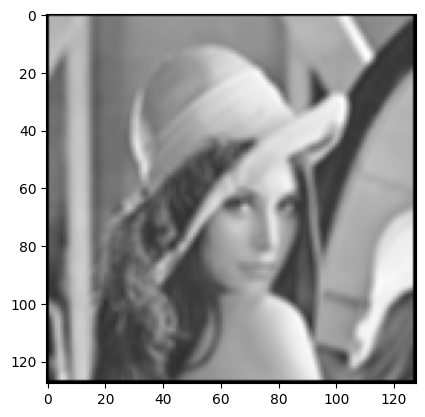

In [12]:
a = convolucao(list_imagem, filter1)
getImageFromListofList(a)

filter2 = [[0,0,0],[1,0,0],[0,0,0]]

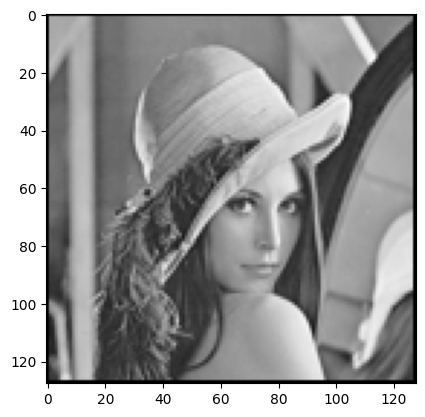

In [13]:
b = convolucao(list_imagem, filter2)
getImageFromListofList(b)

filter3 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

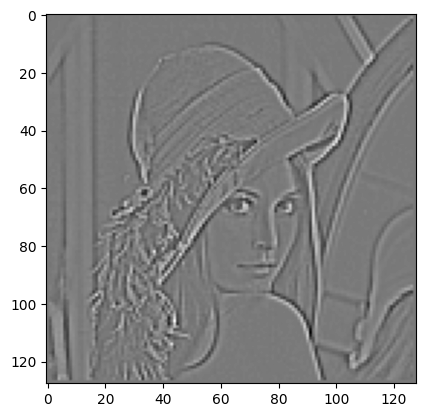

In [14]:
c = convolucao(list_imagem, filter3)
getImageFromListofList(c)

filter4 = [[1,0,-1],[2,0,-2],[1,0,-1]]

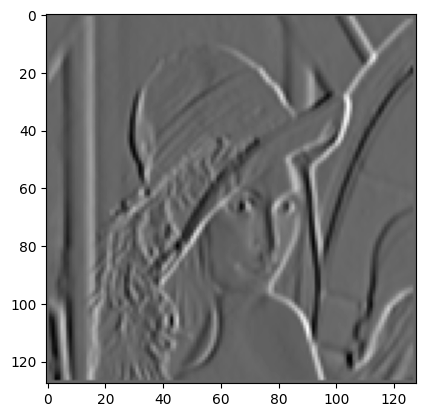

In [15]:
d = convolucao(list_imagem, filter4)
getImageFromListofList(d)

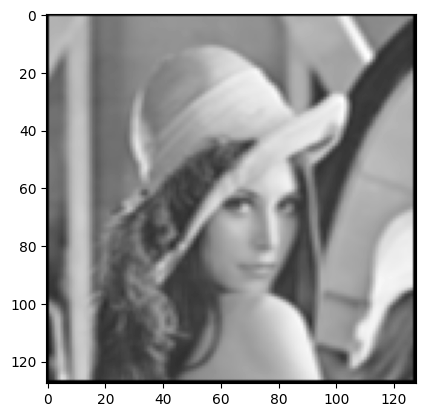

In [23]:
# filtro
filter5 = np.array([[1/9,1/9,1/9],[1/3,1/3,1/3],[1/9,1/9,1/9]])
e = convolucao(list_imagem, filter5)
getImageFromListofList(e)

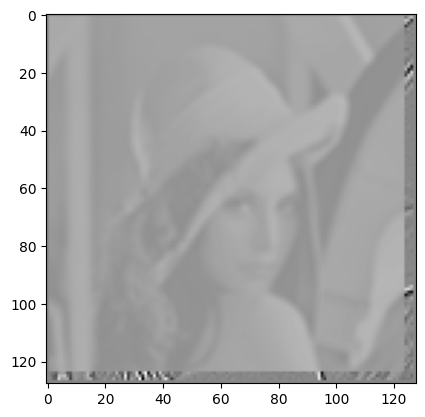

In [22]:
# filtro
filter5 = np.repeat([[1/36,1/36,1/36,1/36,1/36,1/36,]], 6, axis=0)
f = convolucao(list_imagem, filter5)
getImageFromListofList(f)